<h1 style="text-align: center;">Image Classification with CNN for Malaria Data</h1>


In this project, a deep learning model has been developed for the diagnosis of malaria. Using cell images obtained under a microscope, the model, built on the Convolutional Neural Network (CNN) architecture, classifies whether the cells are parasitized or uninfected. This study aims to demonstrate the effectiveness of deep learning methods in the diagnosis of malaria.

[The data can be accessed here](https://lhncbc.nlm.nih.gov/LHC-downloads/downloads.html#malaria-datasets)


<div style="text-align: center;">
    <img src="pic.webp" alt="Home Selling Tips">
</div>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
import cv2
import pandas as pd
import os

In [3]:
labels =['Parasitized','Uninfected']
img_path='cell_images/'

In [4]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [5]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [6]:
d={'Parasitized':1,'Uninfected':0}

In [7]:
df['encode_label']=df['label'].map(d)

In [8]:
df.head()

,img,label,encode_label
0,cell_images/Parasitized/C100P61ThinF_IMG_20150...,Parasitized,1
1,cell_images/Parasitized/C100P61ThinF_IMG_20150...,Parasitized,1
2,cell_images/Parasitized/C100P61ThinF_IMG_20150...,Parasitized,1
3,cell_images/Parasitized/C100P61ThinF_IMG_20150...,Parasitized,1
4,cell_images/Parasitized/C100P61ThinF_IMG_20150...,Parasitized,1


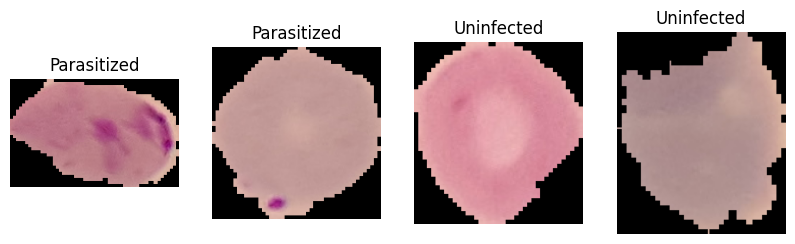

In [9]:
parasitized_samples = df[df['label'] == 'Parasitized'].sample(2)
uninfected_samples = df[df['label'] == 'Uninfected'].sample(2)
samples = pd.concat([parasitized_samples, uninfected_samples])
plt.figure(figsize=(10, 5))
for i, row in enumerate(samples.iterrows()):
    img_path = row[1]['img']  
    label = row[1]['label'] 
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.show()

In [10]:
import numpy as np

In [11]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img=cv2.resize(img, (64,64))  # Boyutunu 170*170 piksel yaptık
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Siyah beyaz hale getirdik
    img=img/255.0  # Normalize ettik
    x.append(img)
x=np.array(x)

In [12]:
y=df['encode_label']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [15]:
from keras.models import Sequential
from keras.layers import  Dense, Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

Epoch 1/15
689/689 [==============================] - 42s 59ms/step - loss: 0.5734 - accuracy: 0.6573 - lr: 0.0010
Epoch 2/15
689/689 [==============================] - 43s 62ms/step - loss: 0.1775 - accuracy: 0.9379 - lr: 0.0010
Epoch 3/15
689/689 [==============================] - 46s 67ms/step - loss: 0.1516 - accuracy: 0.9471 - lr: 0.0010
Epoch 4/15
689/689 [==============================] - 50s 73ms/step - loss: 0.1440 - accuracy: 0.9494 - lr: 0.0010
Epoch 5/15
689/689 [==============================] - 50s 72ms/step - loss: 0.1348 - accuracy: 0.9512 - lr: 0.0010
Epoch 6/15
689/689 [==============================] - 47s 68ms/step - loss: 0.1305 - accuracy: 0.9521 - lr: 0.0010
Epoch 7/15
689/689 [==============================] - 48s 69ms/step - loss: 0.1237 - accuracy: 0.9539 - lr: 0.0010
Epoch 8/15
689/689 [==============================] - 46s 67ms/step - loss: 0.1204 - accuracy: 0.9555 - lr: 0.0010
Epoch 9/15
689/689 [==============================] - 46s 67ms/step - loss: 0.11

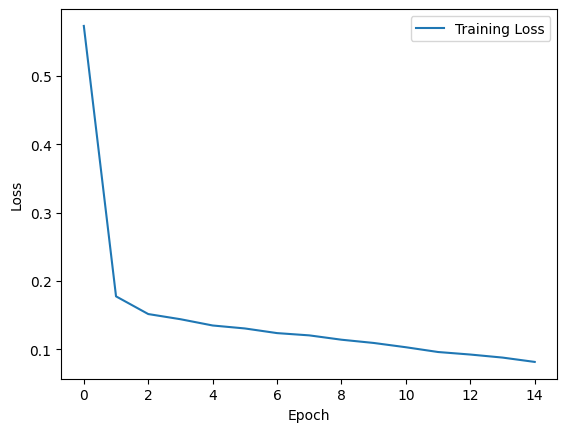

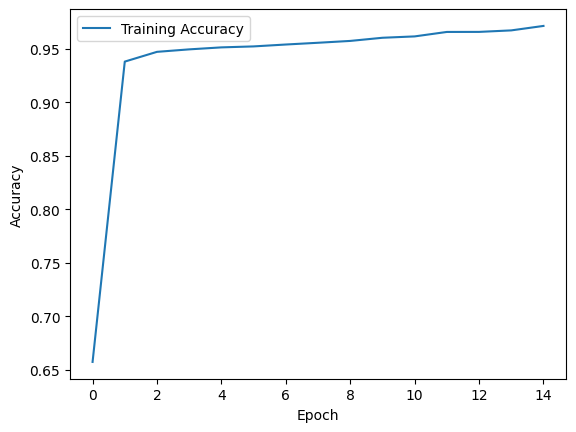

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Model creation
model = Sequential()

# Input layer - Adjusting shape for grayscale images
model.add(Input(shape=(64, 64, 1)))

# 1st Conv2D + MaxPooling2D + Dropout layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 2nd Conv2D + MaxPooling2D + Dropout layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 3rd Conv2D + MaxPooling2D + Dropout layer (Added)
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Flatten layer
model.add(Flatten())

# Dense layer + ReLU activation function
model.add(Dense(128, activation='relu'))

# Output layer - Sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train, 
    epochs=15, 
    callbacks=[EarlyStopping(monitor='loss', patience=10, restore_best_weights=True),
               ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=0.001)]
)

# Visualize training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

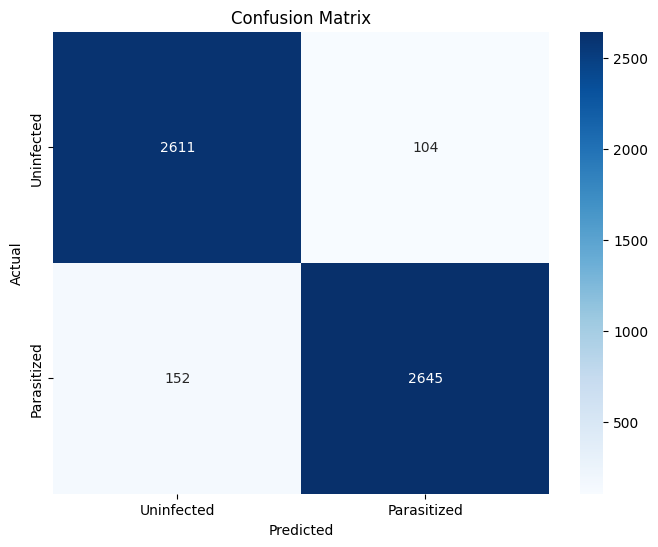

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


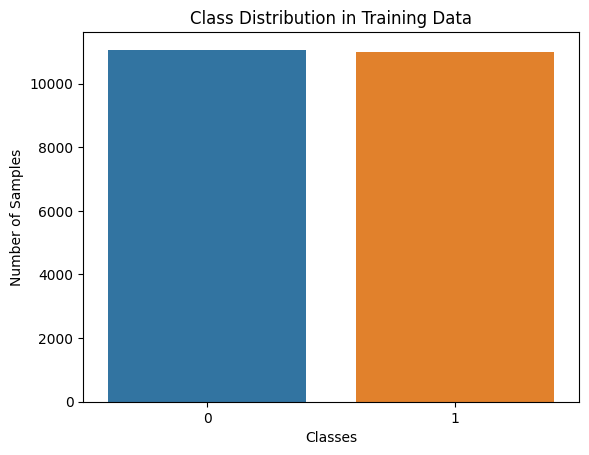

In [30]:
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Data')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.show()


173/173 [==============================] - 2s 14ms/step


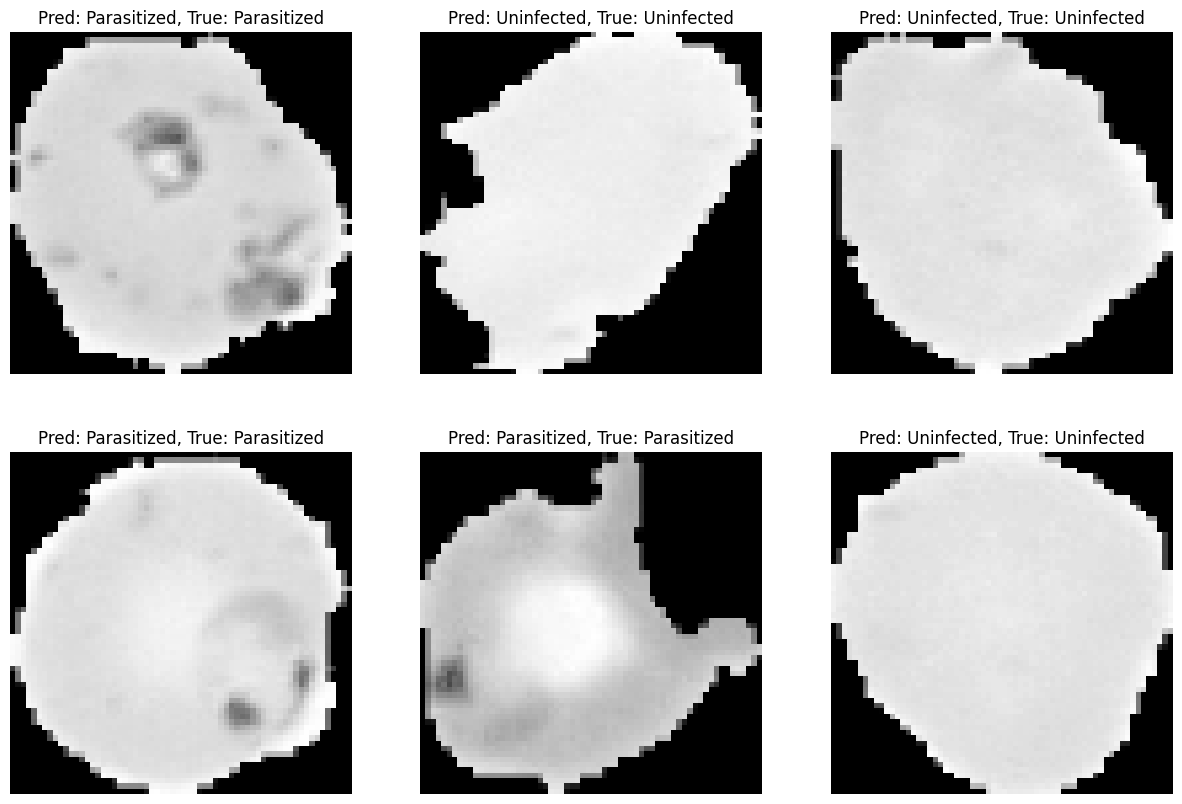

In [26]:
import matplotlib.pyplot as plt
import numpy as np

d = {1: 'Parasitized', 0: 'Uninfected'}

predictions = model.predict(x_test)

predicted_classes = (predictions > 0.5).astype("int32")

num_samples = 6

indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_test[idx].reshape(64, 64), cmap='gray')  # Gri tonlamalı bir görüntü
    pred_label = d[int(predicted_classes[idx][0])]  # Tahmin edilen sınıf etiketi
    true_label = d[int(y_test.iloc[idx])]  # Gerçek sınıf etiketi
    plt.title(f"Pred: {pred_label}, True: {true_label}")
    plt.axis('off')

plt.show()


In this study, a deep learning model was developed for the diagnosis of malaria. Using a Convolutional Neural Network (CNN) architecture, the model was able to classify "Parasitized" and "Uninfected" cells with high accuracy based on microscope images. The model's performance was evaluated using various visualization techniques, with the confusion matrix being particularly effective in validating the results. These findings demonstrate that deep learning methods can be a powerful tool for malaria diagnosis.